# Lesson 2: Embeddings

### Setup
Load needed API keys and relevant Python libaries.

In [ ]:
# !pip install cohere umap-learn altair datasets

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

In [ ]:
import cohere
co = cohere.Client(os.environ['COHERE_API_KEY'])

In [ ]:
import pandas as pd

## Word Embeddings

Consider a very small dataset of three words.

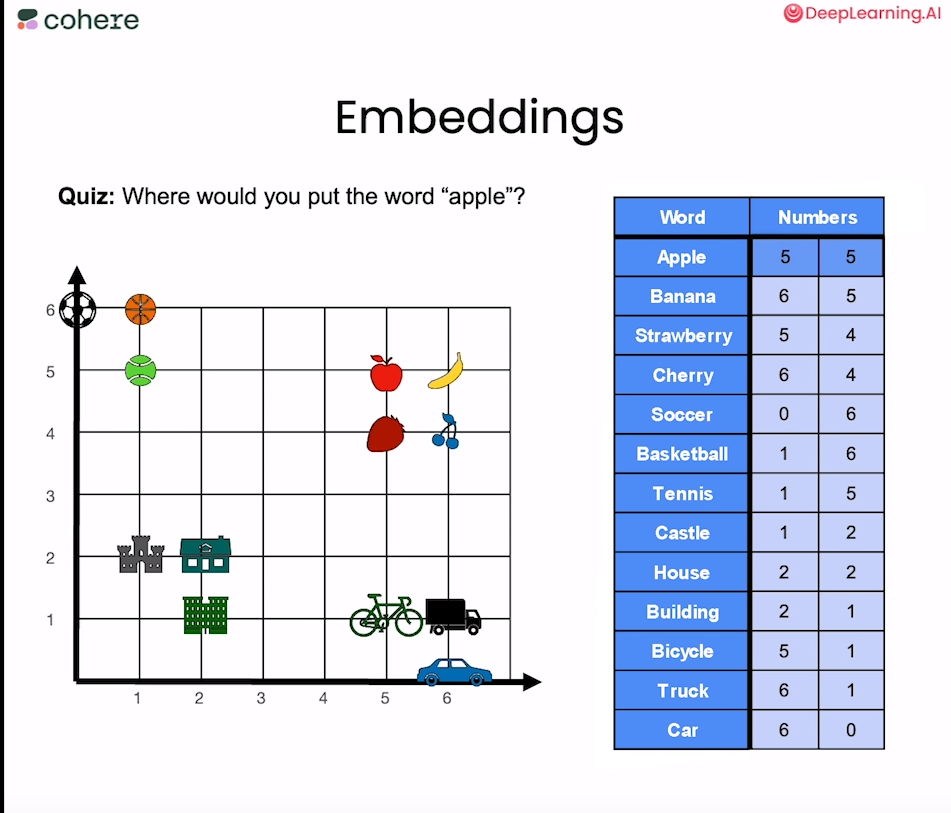

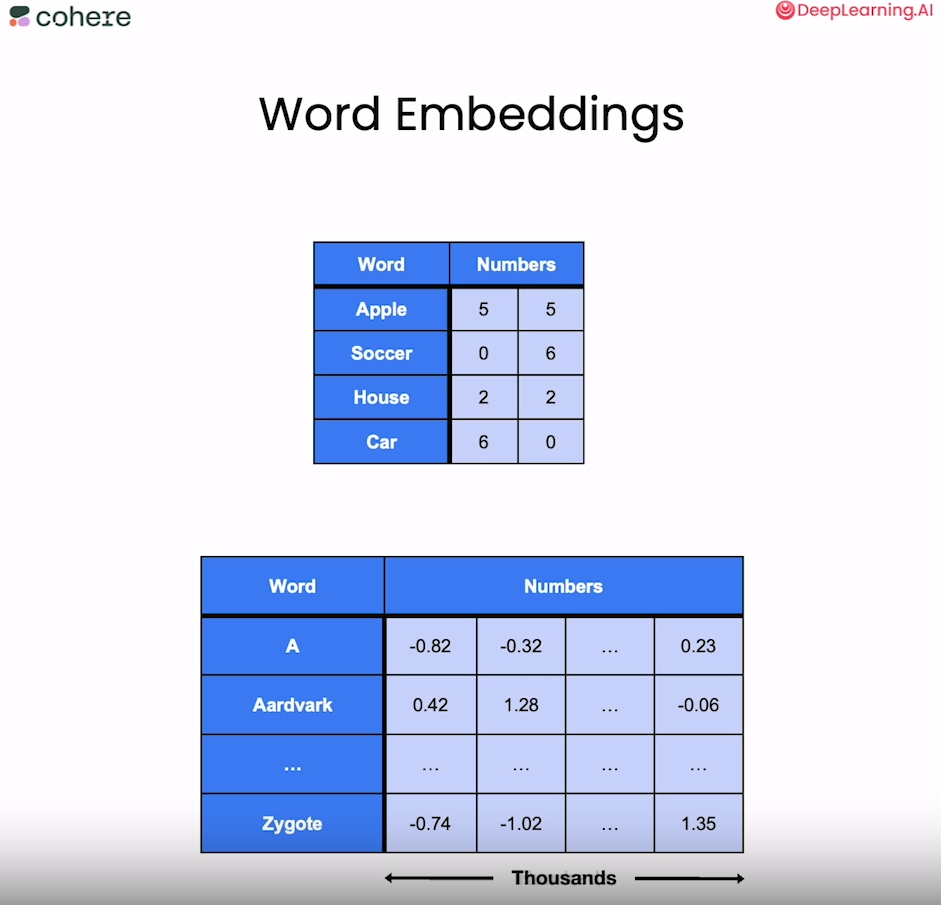

In [ ]:
three_words = pd.DataFrame({'text':
  [
      'joy',
      'happiness',
      'potato'
  ]})

three_words

Let's create the embeddings for the three words:

In [ ]:
three_words_emb = co.embed(texts=list(three_words['text']),
                           model='embed-english-v2.0').embeddings

In [ ]:
word_1 = three_words_emb[0]
word_2 = three_words_emb[1]
word_3 = three_words_emb[2]

In [ ]:
word_1[:10]

## Sentence Embeddings

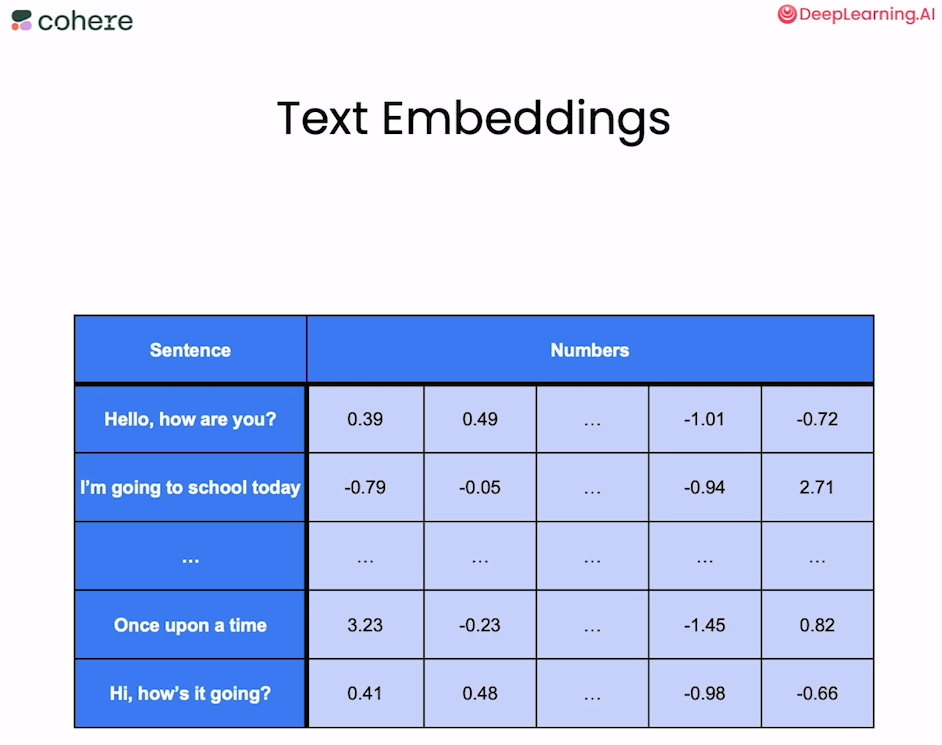

Consider a very small dataset of three sentences.

In [ ]:
sentences = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'The world cup is in Qatar',
   'What color is the sky?',
   'The sky is blue',
   'Where does the bear live?',
   'The bear lives in the the woods',
   'What is an apple?',
   'An apple is a fruit',
  ]})

sentences

Let's create the embeddings for the three sentences:

In [ ]:
emb = co.embed(texts=list(sentences['text']),
               model='embed-english-v2.0').embeddings

# Explore the 10 first entries of the embeddings of the 3 sentences:
for e in emb:
    print(e[:3])

In [ ]:
len(emb[0])

In [ ]:
#import umap
#import altair as alt

In [ ]:
from utils import umap_plot

In [ ]:
chart = umap_plot(sentences, emb)

In [ ]:
chart.interactive()

## Articles Embeddings

In [ ]:
import pandas as pd
wiki_articles = pd.read_pickle('wikipedia.pkl')
wiki_articles

In [ ]:
import numpy as np
from utils import umap_plot_big

In [ ]:
articles = wiki_articles[['title', 'text']]
embeds = np.array([d for d in wiki_articles['emb']])

chart = umap_plot_big(articles, embeds)
chart.interactive()